# EXERCICE 2

reponse 1) Introduction brièvement des données fournies (structure, variables, intérêt).

Structure : - Tableau de données multidimensionnel - Lignes représentant différentes régions de Madagascar - Colonnes incluant le taux d'achèvement, le sexe, et le niveau de vie

Variables : - Variable principale : Taux d'achèvement au niveau secondaire (%) - Variables secondaires : . Région . Sexe . Niveau de vie

Intérêt : - Analyser les disparités éducatives entre régions - Comprendre l'impact du sexe et du niveau de vie sur le taux d'achèvement scolaire - Identifier des groupes de régions avec des caractéristiques éducatives similaires

réponse 2)visualisations pertinentes pour sur ces données.

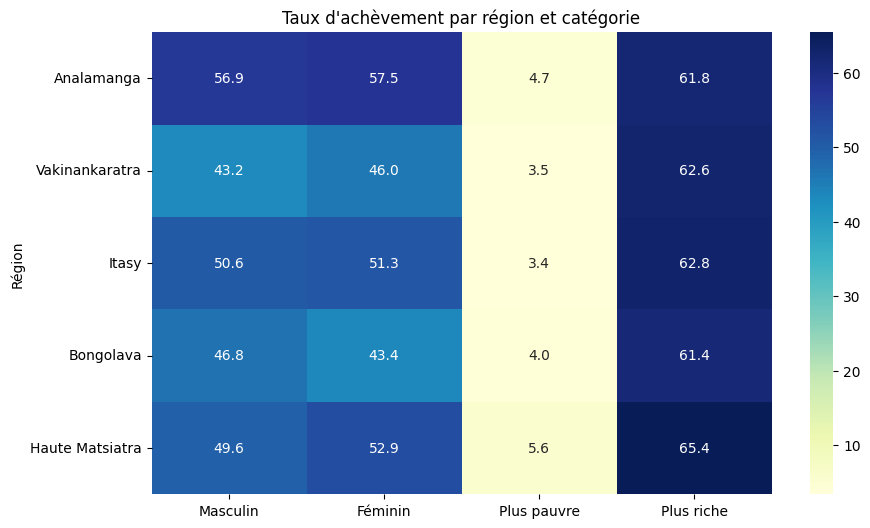

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données (à adapter selon votre tableau)
data = {
    "Région": ["Analamanga", "Vakinankaratra", "Itasy", "Bongolava", "Haute Matsiatra"],
    "Masculin": [56.9, 43.2, 50.6, 46.8, 49.6],
    "Féminin": [57.5, 46.0, 51.3, 43.4, 52.9],
    "Plus pauvre": [4.7, 3.5, 3.4, 4.0, 5.6],
    "Plus riche": [61.8, 62.6, 62.8, 61.4, 65.4]
}

# Créer un DataFrame
df = pd.DataFrame(data)
df.set_index("Région", inplace=True)

# Créer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Taux d'achèvement par région et catégorie")
plt.show()

<ipython-input-2-42aa4a3f1938>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Région", y="Taux d'achèvement", data=df, palette="viridis")


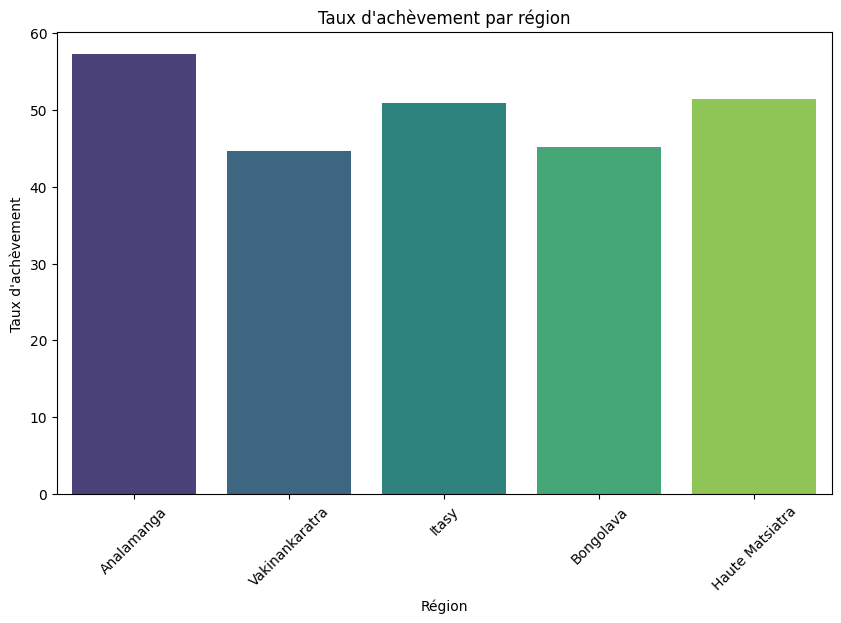

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données (à adapter selon votre tableau)
data = {
    "Région": ["Analamanga", "Vakinankaratra", "Itasy", "Bongolava", "Haute Matsiatra"],
    "Taux d'achèvement": [57.2, 44.6, 50.9, 45.1, 51.4]
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Créer le barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Région", y="Taux d'achèvement", data=df, palette="viridis")
plt.title("Taux d'achèvement par région")
plt.xticks(rotation=45)
plt.show()

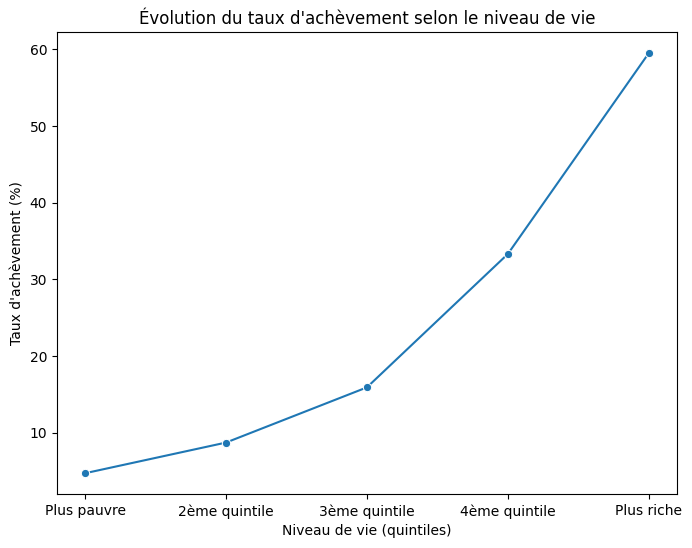

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données (à adapter selon votre tableau)
data = {
    "Quintile": ["Plus pauvre", "2ème quintile", "3ème quintile", "4ème quintile", "Plus riche"],
    "Taux d'achèvement": [4.7, 8.7, 15.9, 33.3, 59.5]
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Créer le line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x="Quintile", y="Taux d'achèvement", data=df, marker="o")
plt.title("Évolution du taux d'achèvement selon le niveau de vie")
plt.xlabel("Niveau de vie (quintiles)")
plt.ylabel("Taux d'achèvement (%)")
plt.show()

reponse 3)Avec l’algorithme K-moyennes, faire un clustering des régions selon ces données. Utiliser le Elbow Method
WCSS pour choisir le nombre de clusters.


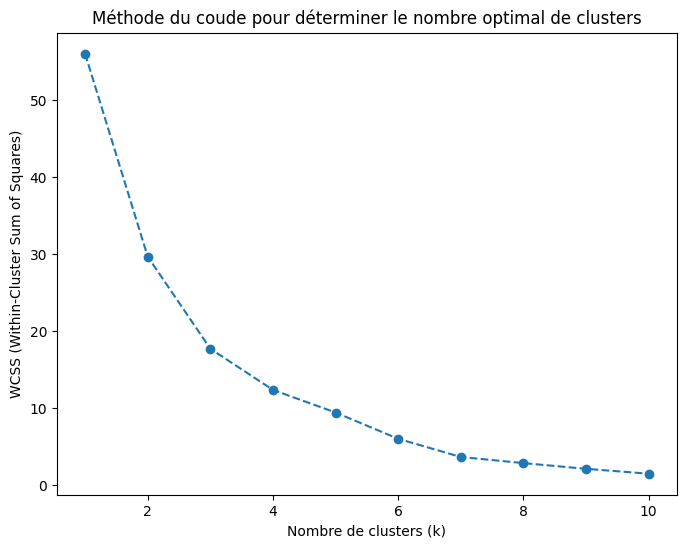

Résultats du clustering :
                   Cluster
Région                    
Analamanga               2
Vakinankaratra           2
Itasy                    2
Bongolava                2
Haute Matsiatra          2
Amoron'i Mania           0
Atsimo Atsinanana        0
Ihorombe                 0
Atsimo Andrefana         0
Androy                   0
Anosy                    0
Menabe                   0
Diana                    1
Sava                     1


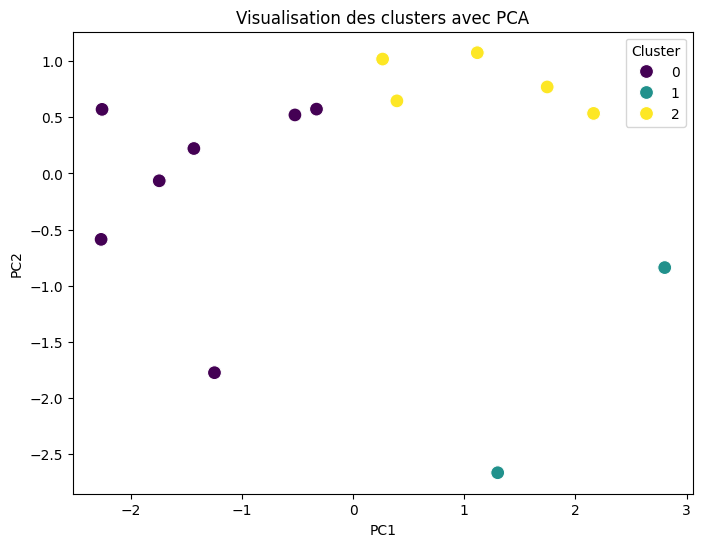

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de données (à adapter selon votre tableau)
data = {
    "Région": ["Analamanga", "Vakinankaratra", "Itasy", "Bongolava", "Haute Matsiatra", "Amoron'i Mania", "Atsimo Atsinanana", "Ihorombe", "Atsimo Andrefana", "Androy", "Anosy", "Menabe", "Diana", "Sava"],
    "Masculin": [56.9, 43.2, 50.6, 46.8, 49.6, 39.1, 40.0, 32.2, 34.5, 27.9, 39.7, 42.4, 56.2, 50.4],
    "Féminin": [57.5, 46.0, 51.3, 43.4, 52.9, 41.9, 32.4, 31.4, 33.2, 25.0, 35.6, 39.9, 56.7, 48.9],
    "Plus pauvre": [4.7, 3.5, 3.4, 4.0, 5.6, 3.9, 5.5, 2.9, 3.0, 3.6, 2.0, 3.0, 8.6, 9.0],
    "Plus riche": [61.8, 62.6, 62.8, 61.4, 65.4, 60.4, 48.0, 50.3, 54.2, 60.2, 54.1, 58.3, 60.8, 49.0]
}

# Créer un DataFrame
df = pd.DataFrame(data)
df.set_index("Région", inplace=True)

# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertir en DataFrame pour une meilleure visualisation
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

# Méthode du coude pour déterminer le nombre optimal de clusters
wcss = []
for k in range(1, 11):  # Testons de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS est stocké dans l'attribut inertia_

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

# Appliquer K-means avec le nombre optimal de clusters (supposons k=3)
k = 3  # Remplacez par la valeur optimale trouvée avec la méthode du coude
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

# Ajouter les labels des clusters au DataFrame original
df["Cluster"] = kmeans.labels_

# Afficher les résultats
print("Résultats du clustering :")
print(df[["Cluster"]])

# Visualisation des clusters avec PCA (réduction à 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"], index=df.index)

# Ajouter les labels des clusters
df_pca["Cluster"] = df["Cluster"]

# Tracer les clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette="viridis", s=100)
plt.title("Visualisation des clusters avec PCA")
plt.show()

reponse 4)Interpréter les résultats : que représentent les clusters obtenus ? Quels regroupements semblent significatifs
et pourquoi ?







reponse 4):

#Cluster0:
 Régions avec des taux d'achèvement faibles
Régions incluses :
     Amoron'i Mania, Atsimo Atsinanana, Ihorombe, Atsimo Andrefana, Androy, Anosy, Menabe.



Caractéristiques :
    Ces régions ont des taux d'achèvement faibles pour les hommes et les femmes, ainsi que pour les différents niveaux de vie (plus pauvre, plus riche).



Interprétation :
    Ces régions sont probablement les plus défavorisées, avec des défis importants en matière d'éducation. Les faibles taux d'achèvement peuvent être liés à la pauvreté, au manque d'infrastructures éducatives, ou à des barrières culturelles ou sociales. Ces régions nécessitent des interventions prioritaires pour améliorer l'accès à l'éducation.

#Cluster 1 :
    Régions avec des taux d'achèvement élevés
    Régions incluses : Diana, Sava.

Caractéristiques :
    Ces régions ont des taux d'achèvement élevés pour les hommes et les femmes, ainsi que pour les différents niveaux de vie.

Interprétation :
    Ces régions sont probablement plus développées économiquement, avec un meilleur accès à l'éducation et des infrastructures éducatives de qualité. Les taux d'achèvement élevés pour les hommes et les femmes suggèrent une certaine égalité des sexes en matière d'éducation.

#Cluster 2 :
Régions avec des taux d'achèvement moyens
Régions incluses :
  Analamanga, Vakinankaratra, Itasy, Bongolava, Haute Matsiatra.

Caractéristiques :
    Ces régions ont des taux d'achèvement modérés, avec des disparités possibles entre les sexes ou les niveaux de vie.

Interprétation :
    Ces régions peuvent avoir des conditions éducatives intermédiaires, avec des efforts nécessaires pour améliorer l'accès à l'éducation, en particulier pour les groupes défavorisés (par exemple, les plus pauvres). Les disparités entre les sexes peuvent indiquer des inégalités à combler.




#Regroupements significatifs
Les regroupements les plus significatifs sont ceux qui mettent en évidence des disparités claires entre les régions. Par exemple :

*Cluster 0 vs Cluster 1 :*

Le Cluster 0 (taux faibles) et le Cluster 1 (taux élevés) montrent une polarisation claire entre les régions défavorisées et les régions développées.

Cette distinction est significative car elle met en lumière les inégalités régionales en matière d'éducation.

*Cluster 2 :*

Le Cluster 2 (taux moyens) représente des régions qui se situent entre les deux extrêmes. Ces régions peuvent être considérées comme des "zones intermédiaires" où des efforts ciblés pourraient avoir un impact significatif.






#Pourquoi ces regroupements sont-ils significatifs ?
*Identification des priorités :*

Les clusters permettent d'identifier les régions qui nécessitent une attention particulière. Par exemple, les régions du Cluster 0 (taux faibles) devraient être prioritaires pour des interventions éducatives.

*Compréhension des disparités :*

Les clusters montrent clairement les disparités entre les régions en termes d'accès à l'éducation. Cela peut aider à orienter les politiques publiques pour réduire ces inégalités.

*Égalité des sexes :*

Les clusters peuvent également révéler des disparités entre les sexes. Par exemple, si certaines régions montrent des taux d'achèvement significativement plus faibles pour les femmes, cela peut indiquer un besoin de politiques spécifiques pour promouvoir l'égalité des sexes.

*Niveau de vie :*

Les clusters prennent en compte le niveau de vie (quintiles), ce qui permet de comprendre comment la pauvreté affecte l'éducation. Les régions avec des taux d'achèvement faibles parmi les plus pauvres nécessitent des interventions ciblées pour améliorer l'accès à l'éducation.